# Decision Trees and Random Forests

This dataset records information about children who have had corrective spinal surgery.

**Dataset Details**

It contains 4 columns:


Kyphosis: 	    Whether the kyphosis condition is present after surgery (present or absent) – this is the target variable

Age:            Age in months at the time of surgery

Number:	        Number of vertebrae involved

Start:	        The starting vertebrae number of the operation


We'll try to predict the presence of kyphosis after surgery.

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [31]:
df = pd.read_csv('../../data/kyphosis.csv')

In [32]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

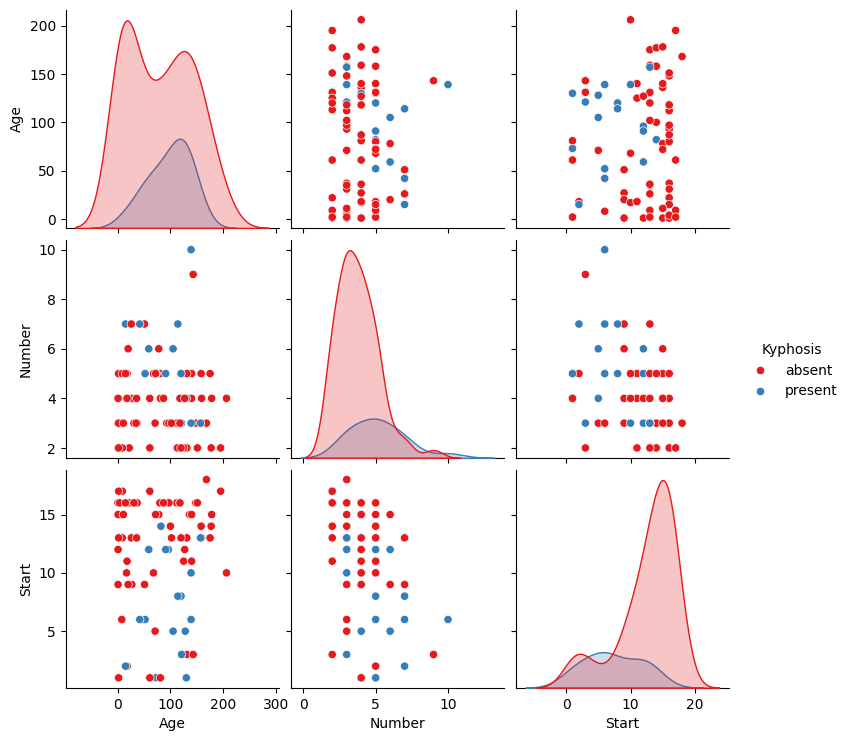

In [33]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [36]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.77      0.87        22
     present       0.38      1.00      0.55         3

    accuracy                           0.80        25
   macro avg       0.69      0.89      0.71        25
weighted avg       0.93      0.80      0.83        25



In [38]:
print(confusion_matrix(y_test,predictions))

[[17  5]
 [ 0  3]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [39]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators is the number of decision trees in your random forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[17  5]
 [ 1  2]]


In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.94      0.77      0.85        22
     present       0.29      0.67      0.40         3

    accuracy                           0.76        25
   macro avg       0.62      0.72      0.62        25
weighted avg       0.87      0.76      0.80        25

